## <span style="color:blue">Introduction to computation in physical sciences</span>
### J Wang and A Wang, [github.com/com-py/intro](https://github.com/com-py/intro) 
### Ch05, `p7-emotion-vp`, Motion in electromagnetic fields

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import vpython as vp
%matplotlib ipympl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
def paraperp(v, B):     # project para // and perp _|_ velocities
    vpara = np.dot(v,B) * B/np.dot(B, B)
    vperp = v - vpara
    mperp = np.sqrt(np.dot(vperp, vperp))
    return vpara, vperp, mperp

E = np.array([0, 0.0, 1.e4])
B = np.array([1.0, 0.0, 0.0])
qm = 1.0        # q/m
dt = 0.01
r = np.array([0., 0., 0.])
v = np.array([2.e4, 1.e5, 0.])
rlist = []

In [3]:
t = 0.0
scene = vp.canvas(background=vp.color.blue, forward=vp.vector(-.8,-.5,-.2))
ball = vp.sphere(radius=1, make_trail=True)
while t < 20.0:
    vp.rate(100)
    ball.pos=vp.vector(r[0], r[1], r[2])    
    rlist.append(r)
    r = r + v*dt/2          # half step r at midpoint
    
    v = v + qm*E*dt/2       # half step by E field
    vpara, vperp, mperp0 = paraperp(v, B)
    
    a = qm*np.cross(v, B)   # full step by B field
    v = v + a*dt
    vpara, vperp, mperp = paraperp(v, B)
    vperp = vperp*mperp0/mperp      # correct magnitude
    v = vpara + vperp
    
    v = v + qm*E*dt/2       # 2nd half step by E field
    r = r + v*dt/2          # 2nd half step r
    t = t + dt

<IPython.core.display.Javascript object>

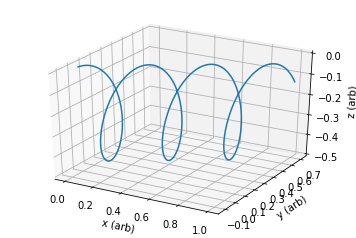

In [4]:
rlist = np.array(rlist)/np.max(np.abs(rlist))   # scale r
ax = plt.subplot(111, projection='3d')
ax.plot(rlist[:,0], rlist[:,1], rlist[:,2])
ax.set_xlabel('x (arb)'), ax.set_ylabel('y (arb)')    
ax.set_zlabel('z (arb)'), ax.set_zlim(-.5 ,0) 
plt.show()